In [16]:
import pandas as pd

In [17]:
# Read the 2023 parquet
df_jfk_2023 = pd.read_parquet("../data/interim/processed_jfk.parquet")

In [18]:
df_jfk_2023.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,pickup_date
21,1,2023-01-01 00:13:30,2023-01-01 00:44:00,1.0,17.80,2.0,N,132,116,1,...,1.25,0.5,15.85,6.55,1.0,95.15,0.0,1.25,NaN,2023-01-01
48,2,2023-01-01 00:41:41,2023-01-01 01:19:32,1.0,11.11,1.0,N,132,61,1,...,1.00,0.5,10.31,0.00,1.0,61.86,0.0,1.25,NaN,2023-01-01
59,2,2023-01-01 00:22:39,2023-01-01 01:30:45,1.0,16.02,1.0,N,132,265,2,...,1.00,0.5,0.00,0.00,1.0,64.85,0.0,1.25,NaN,2023-01-01
90,2,2023-01-01 00:37:44,2023-01-01 01:16:14,1.0,11.03,1.0,N,132,188,1,...,1.00,0.5,13.45,0.00,1.0,68.50,0.0,1.25,NaN,2023-01-01
91,2,2023-01-01 00:49:24,2023-01-01 01:30:59,1.0,13.54,1.0,N,132,149,1,...,1.00,0.5,12.86,0.00,1.0,78.41,0.0,1.25,NaN,2023-01-01


In [19]:
df_jfk_2023.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
Airport_fee                     float64
pickup_date                      object
dtype: object

In [40]:
# Now group by hour

# Create date and hour column
df_jfk_2023['pickup_hour'] = df_jfk_2023['tpep_pickup_datetime'].dt.hour
df_jfk_2023['pickup_date'] = df_jfk_2023['tpep_pickup_datetime'].dt.date

# Trips per hour by date
hourly_counts = df_jfk_2023.groupby(['pickup_hour', 'pickup_date']).size().reset_index(name='count')

# Trips per day
daily_count = df_jfk_2023.groupby('pickup_date').size().reset_index(name = 'count')



In [41]:
daily_count

,pickup_date,count
0,2023-01-01,5582
1,2023-01-02,6419
2,2023-01-03,6784
3,2023-01-04,6006
4,2023-01-05,5617
...,...,...
360,2023-12-27,6027
361,2023-12-28,6014
362,2023-12-29,5755
363,2023-12-30,5733


<Axes: xlabel='pickup_hour'>

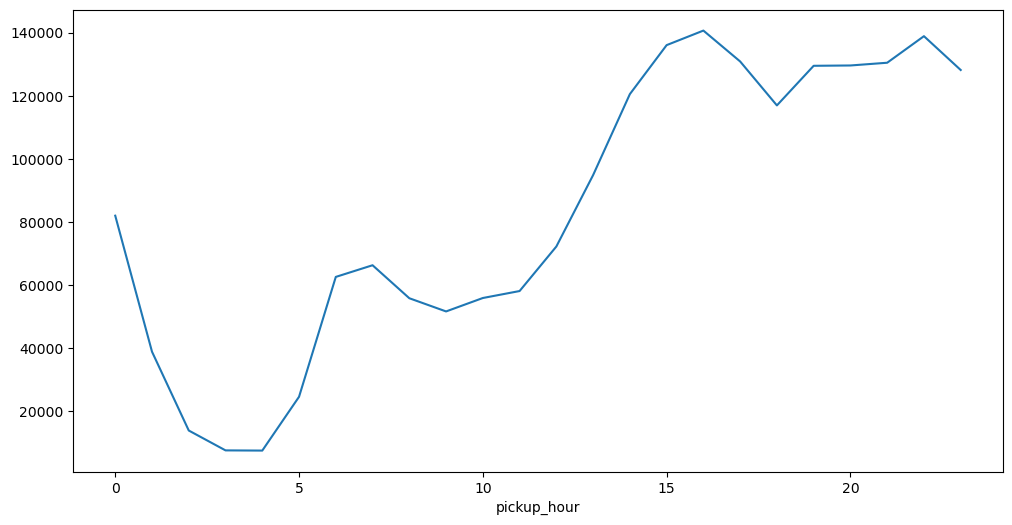

In [23]:
ts.plot(figsize = (12,6))